# Project Name - EDA on Shark Tank India Data
**Project Type** - EDA
**Contribution** - Individual
**Name** - Anshika Arya

# Problem Statement and Project Background
**Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, using different data visualization methods like Matplotlib, Seaborn, Pandas etc. Shark Tank India has recently attracted all of our attentions in the last few months. I was busy analyzing the season where I have used the Kaggle Dataset.**

**Problem Statement**

As a fan of Shark Tank India, you might be curious about

1. Startups who rejected sharks Offer

2. Maximum No. of Sharks In a deal

3. Total Amount Invested/lent by different sharks

4. Portfolios of different sharks

5. Companies who got the same valuation as requested

6. Which companies were on pre-revenue or didn’t have any revenue (as of pitching day)?

**Here’s is Step-by-Step Outline of the Project:**

A) Install and Importing Required Libraries.

B) Downloading Data Set.

C) Finding Insights from Dataset.

D) Data Visualization.

GitHub Link -
Github Link:- "Give link here"

Let's Begin !

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sharktankindia/Shark Tank India.csv


In [2]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

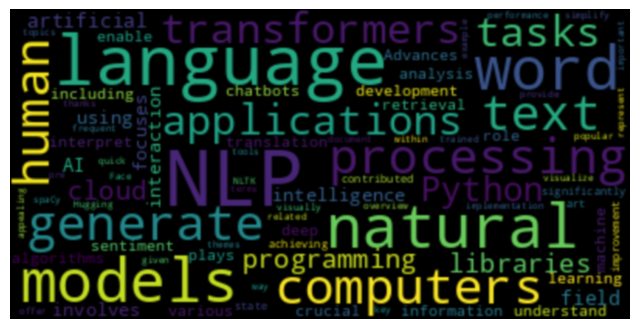

In [3]:
# WordCloud Code Demonstration
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text data
text_data = """
Natural language processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to enable computers to understand, interpret, and generate human-like text.

NLP plays a crucial role in various applications, including machine translation, sentiment analysis, chatbots, and information retrieval. Advances in deep learning have significantly contributed to the improvement of NLP tasks, with models like transformers achieving state-of-the-art performance.

Python is a popular programming language for NLP tasks, thanks to libraries like NLTK, spaCy, and Hugging Face's Transformers. These libraries provide tools and pre-trained models that simplify the implementation of NLP applications.

Word clouds are a visually appealing way to represent the most frequent words in a given text. They offer a quick overview of the key themes and topics within a document. In this example, we generate a word cloud to visualize the important terms related to natural language processing and Python programming.
"""

# Create WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black').generate(text_data)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

# Dataset Loading

In [4]:
df = pd.read_csv('/kaggle/input/sharktankindia/Shark Tank India.csv')


# Exploring the Data

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Season Number,Startup Name,Season Start,Season End,Episode Number,Episode Title,Anchor,Pitch Number,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Deal has conditions,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name,Ashneer Present,Namita Present,Anupam Present,Vineeta Present,Aman Present,Peyush Present,Ghazal Present,Amit Present,Guest Present
0,1,BluePineFoods,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,1,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,NaN,0.0,Middle,2016.0,Delhi,Delhi,95.0,8.0,NaN,NaN,50.0,5.0,1000.0,1,1.0,75.0,16.00,NaN,NaN,469.0,3.0,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,1,BoozScooters,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,2,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,NaN,0.0,Young,2017.0,Ahmedabad,Gujarat,4.0,0.4,NaN,NaN,40.0,15.0,267.0,1,1.0,40.0,50.00,NaN,NaN,80.0,2.0,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,1,HeartUpMySleeves,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,3,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,NaN,0.0,Young,2021.0,Delhi,Delhi,NaN,2.0,NaN,NaN,25.0,10.0,250.0,1,1.0,25.0,30.00,NaN,NaN,83.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,15.0,NaN,12.5,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,1,TagzFoods,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",Rannvijay Singh,4,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,NaN,0.0,Middle,2019.0,Bangalore,Karnataka,700.0,NaN,48.0,NaN,70.0,1.0,7000.0,1,1.0,70.0,2.75,NaN,NaN,2545.0,1.0,NaN,NaN,70.0,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,1,HeadAndHeart,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",Rannvijay Singh,5,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,NaN,1.0,Middle,2015.0,Patiala,Punjab,30.0,NaN,NaN,NaN,50.0,5.0,1000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [7]:
shark_tank_df.tail()

NameError: name 'shark_tank_df' is not defined

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
duplicate_count = len(df[df.duplicated()])
print(f"number of duplicated rows are {duplicate_count}")

In [ ]:

# Finding Null Values Count
df.isnull().sum().sort_values(ascending=False)

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
plt.xlabel("Name of the columns", fontsize = 12)
plt.title("Places of missing values in the columns", fontsize = 14)

# **Correlation Matrix**

In [ ]:

numeric_df = df.select_dtypes(include=[float, int])

numeric_df.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='viridis')

# EDA (Exploratory Data Analysis)

# **Season 1 & 2 - Shark Tank India**


In [ ]:
shark_tank_df['Season Number'].value_counts()

In [ ]:
print(df['Season Number'].max(), "seasons \n")
print(df['Episode Number'].max(), "episodes \n")
print(df['Pitch Number'].max(), "startup companies came for pitching \n")

# Distribution of Cities from which Pitchers came

In [ ]:
print(df['Pitchers City'].value_counts().head(20))

In [ ]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data=df,y='Pitchers City', orient='h',order=df['Pitchers City'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Pitchers Cities Count',size=20)

# Year in which Startups began their operation

In [ ]:
print(df['Started in'].value_counts(),'\n')

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data =df , x = 'Started in' ,palette="husl", order = df['Started in'].value_counts().index)
plt.title('Startup Commencement Year',size=20)

# Distribution of States from which Pitchers came

In [ ]:

print(df['Pitchers State'].value_counts())

In [ ]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data =df , y = 'Pitchers State' ,orient = 'v',palette="husl", order = df['Pitchers State'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Pitchers State Distribution',size=20)

# Distribution of different Industries that came for pitching

In [ ]:
print(df['Industry'].value_counts())

In [ ]:

tmp = df['Industry'].value_counts().sort_values(ascending=True).reset_index()
tmp.columns = ['Industry', 'Count']

fig = px.bar(tmp, x="Count", y="Industry", title="Different Industries that came in Shark Tank India", 
             color='Industry', template='simple_white', text='Count', orientation='h')

# Show the plot
fig.show()

# Gender Wise Distribution of Entrepreneurs

In [ ]:
print("Total pitchers -", int(df['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(df['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(df['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(df['Male Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(df['Female Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(df.loc[df['Couple Presenters']==1]['Couple Presenters'].sum()/df['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')
     

# Top 10 Highest Yearly Revenue of the brands

In [ ]:
print(df.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

In [ ]:
tmpdf = df.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='plotly', title="Highest Revenue Start-ups", text=tmpdf['Yearly Revenue'])
fig.show()

# Top 10 highest Gross Margin of different brands

In [ ]:
tmpdf = df.set_index("Startup Name")["Gross Margin"].sort_values(ascending=False).nlargest(10)
tmpdf

In [ ]:
# visualisation code
tmpdf = df.sort_values('Gross Margin',ascending=False)[0:10]

fig = px.bar(tmpdf, x="Startup Name" , y="Gross Margin" , color="Startup Name" ,template='plotly',title="Highest Gross Margin Start-ups",text=tmpdf['Gross Margin'] )
fig.show()

# How many accepted or rejected sharks offers?

In [ ]:
df['Accepted Offer'].value_counts()

In [ ]:

print(f"{df['Accepted Offer'].value_counts().iloc[0]} Pitchers accepted the shark's offer.")
print(f"{df['Accepted Offer'].value_counts().iloc[1]} Pitchers rejected the shark's offer.")
     

In [ ]:

# Visualization Code
sns.countplot(data=df,x='Accepted Offer',palette='viridis')

# Startup Companies who rejected shark's offer

In [ ]:
df[df['Accepted Offer'] == 0][['Season Number','Startup Name','Business Description',
                                               'Original Ask Amount','Original Offered Equity',
                                               'Valuation Requested',]]

# **Industry wise Investments By different sharks**

# **Ashneer's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
df[df['Ashneer Investment Amount']>0]['Industry'].value_counts().plot.pie(autopct='%1.2f%%', startangle=90)

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
tmpdf

In [ ]:

# Visualization Code
tmpdf = df.loc[df['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Ashneer (in %) for investment (in lakhs)", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Namita's Investment**

In [ ]:

# Finding the count of various Industries
df[df['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:

# Viewing the DataFrame
tmpdf = df.loc[df['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Namita (in %) for investment (in lakhs)", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Anupam's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:

# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Anupam (in %) for investment (in lakhs)", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Vineeta's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Vineeta (in %) for investment (in lakhs)", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Aman's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
df[df['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

# **Peyush's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Peyush (in %) for investment (in lakhs)", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Ghazal's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Ghazal (in %) for investment (in lakhs)", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Amit's Investment**

In [ ]:
# Finding the count of various Industries
df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [ ]:
# Viewing the DataFrame
tmpdf = df.loc[df['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
tmpdf

In [ ]:
# Visualization Code
tmpdf = df.loc[df['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Amit (in %) for investment (in lakhs)", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

# **Guest's Investment**

In [ ]:
# Printing the Guest's Name
print(f"The Guest's name is {df[df['Guest Name']=='Vikas']['Guest Name'].iloc[0]}.")

In [ ]:
# Finding the count of various Industries
df[df['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

In [ ]:
# Plotting the chart
plt.figure(figsize=(12,6))
df[df['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
     

In [ ]:

# Viewing the DataFrame
tmpdf = df.loc[df['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
tmpdf

In [ ]:

# Visualization Code
tmpdf = df.loc[df['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.bar(tmpdf, x="Guest Investment Equity", y='Guest Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Guest (in %) for investment (in lakhs)", text=tmpdf['Guest Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()
     


# **Number of sharks in a deal**

In [ ]:
# Visualization Code
print(round(df['Number of sharks in deal'].value_counts(normalize=True) * 100).astype(str).str.replace('.0','%'))
sns.countplot(data=df,x='Number of sharks in deal',palette='viridis')

In [ ]:
# The deal where more than or equal to 5 sharks were involved
tmdf = df[df['Number of sharks in deal'] >= 5][['Startup Name','Total Deal Amount','Total Deal Equity']]
tmdf

# Total Amount Asked by the Pitchers

In [ ]:
# Amount asked by the pitchers
print(format_currency(df['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

# Total Amount Invested by the sharks

In [ ]:

# Amount invested by the sharks
print(format_currency(df['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

In [ ]:
df.head()

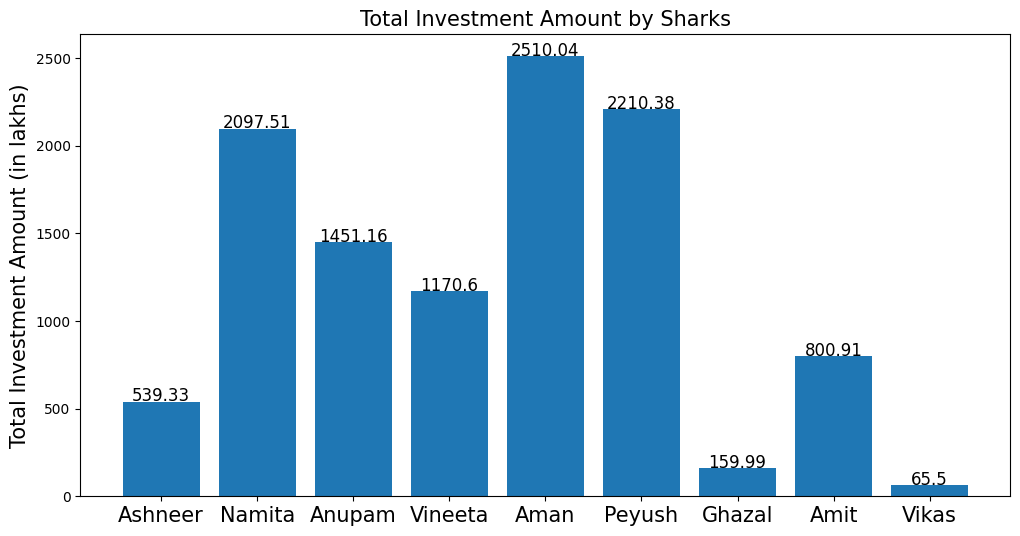

In [8]:
amount = [df['Ashneer Investment Amount'].sum(), df['Namita Investment Amount'].sum(), df['Anupam Investment Amount'].sum(), df['Vineeta Investment Amount'].sum(),
    df['Aman Investment Amount'].sum(), df['Peyush Investment Amount'].sum(), df['Ghazal Investment Amount'].sum(), df['Amit Investment Amount'].sum(), df['Guest Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
tmpdf = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(tmpdf['Name'], tmpdf['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()



# Total Amount Lent by the Sharks

In [9]:
# Amount invested by the sharks
print(format_currency(df['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹18.11 crores


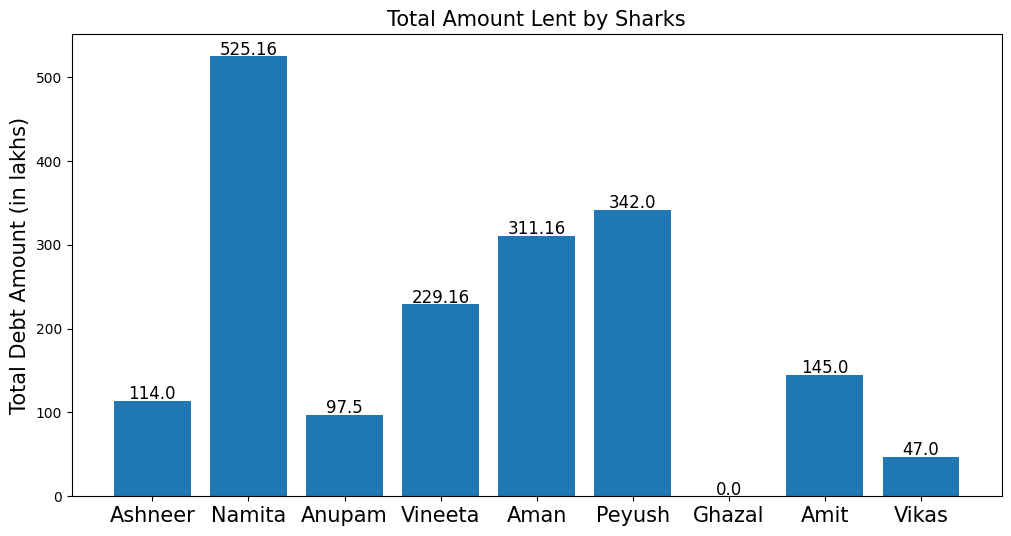

In [10]:
# Visualization Code
amount = [df['Ashneer Debt Amount'].sum(), df['Namita Debt Amount'].sum(), df['Anupam Debt Amount'].sum(), df['Vineeta Debt Amount'].sum(),
    df['Aman Debt Amount'].sum(), df['Peyush Debt Amount'].sum(), df['Ghazal Debt Amount'].sum(), df['Amit Debt Amount'].sum(), df['Guest Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
tmpdf = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(tmpdf['Name'], tmpdf['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Amount Lent by Sharks", fontsize=15)
plt.show()

# **PORTFOLIO'S OF DIFFERENT SHARKS**

# **Peyush's Portfolio**

In [11]:
print("Peyush Bansal's total investments =", df[df['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush =", round(df['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush =", round(df['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush =", round(df['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Peyush Bansal's total investments = 68
Investment amount by Peyush = 22.1 crores

Equity received by Peyush = 422.11 % in different companies

Debt/loan amount by Peyush = 3.42 crores

--------------------------------------------------------------------------------
          Startup Name             Industry  Peyush Investment Amount
0   VivalyfInnovations       Medical/Health                 28.000000
1                Ariro        Manufacturing                 25.000000
2              Nuutjob       Beauty/Fashion                  8.330000
3             Meatyour                 Food                 10.000000
4            EventBeep            Education                 10.000000
5                 LOKA  Technology/Software                 13.330000
6                Annie            Education                 35.000000
7           Carragreen        Manufacturing                 25.000000
8        TheYarnBazaar        Manufacturing                 25.000000
9                  PNT  Technology

# Aman's Portfolio

In [12]:
print("Aman Gupta's total investments =", df[df['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman =", round(df['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman =", round(df['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman =", round(df['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Aman Gupta's total investments = 72
Investment amount by Aman = 25.1 crores

Equity received by Aman = 260.93 % in different companies

Debt/loan amount by Aman = 3.11 crores

--------------------------------------------------------------------------------
          Startup Name                      Industry  Aman Investment Amount
0        BluePineFoods                          Food               25.000000
1            Peeschute                Beauty/Fashion               75.000000
2               Bummer                Beauty/Fashion               37.500000
3           RevampMoto  Vehicles/Electrical Vehicles               50.000000
4        SkippiIcePops                          Food               20.000000
5    RaisingSuperstars                     Education               50.000000
6               Kavach                     Education                2.500000
7          BeyondSnack                          Food               25.000000
8                Altor                 Manufacturi

# Ghazal's Portfolio

In [13]:
print("Ghazal Alagh's total investments =", df[df['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal =", round(df['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal =", round(df['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal =", round(df['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]].reset_index().drop('index',axis=1))
     

Ghazal Alagh's total investments =  8
Investment amount by Ghazal = 1.6 crores

Equity received by Ghazal = 51.7 % in different companies

Debt/loan amount by Ghazal = 0.0 crores

--------------------------------------------------------------------------------
         Startup Name        Industry  Ghazal Investment Amount
0          TheSassBar  Beauty/Fashion                 25.000000
1  SunfoxTechnologies  Medical/Health                 20.000000
2   WattTechnovations  Medical/Health                  0.000253
3             HumpyA2            Food                 33.330000
4   GoldSafeSolutions   Manufacturing                 16.660000
5          WakaoFoods            Food                 25.000000
6    NomadFoodProject            Food                 10.000000
7             WitBlox   Manufacturing                 30.000000


# Ashneer's Portfolio

In [14]:
print("Ashneer Grover's total investments =", df[df['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer =", round(df['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer =", round(df['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer =", round(df['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]].reset_index().drop('index',axis=1))
     

Ashneer Grover's total investments = 21
Investment amount by Ashneer = 5.39 crores

Equity received by Ashneer = 93.24 % in different companies

Debt/loan amount by Ashneer = 1.14 crores

--------------------------------------------------------------------------------
          Startup Name                      Industry  \
0        BluePineFoods                          Food   
1         BoozScooters  Vehicles/Electrical Vehicles   
2            TagzFoods                          Food   
3        SkippiIcePops                          Food   
4    RaisingSuperstars                     Education   
5          BeyondSnack                          Food   
6         MotionBreeze  Vehicles/Electrical Vehicles   
7            EventBeep                     Education   
8        TheYarnBazaar                 Manufacturing   
9          BambooIndia                 Manufacturing   
10  FindYourKicksIndia                Beauty/Fashion   
11        AasVidyalaya                     Education   
12 

In [15]:
print("Namita Thapar's Total Investments =", df[df['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita =", round(df['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita =", round(df['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita =", round(df['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Namita Thapar's Total Investments = 66
Investment amount by Namita = 20.98 crores

Equity received by Namita = 301.59 % in different companies

Debt/loan amount by Namita = 5.25 crores

--------------------------------------------------------------------------------
          Startup Name        Industry  Namita Investment Amount
0          JhaJiAchaar            Food                 28.300000
1               Bummer  Beauty/Fashion                 37.500000
2        SkippiIcePops            Food                 20.000000
3         Menstrupedia       Education                 50.000000
4                Altor   Manufacturing                 25.000000
5              Nuutjob  Beauty/Fashion                  8.330000
6                Farda  Beauty/Fashion                 15.000000
7                 Auli  Beauty/Fashion                 75.000000
8                Annie       Education                 35.000000
9      TheRenalProject  Medical/Health                 50.000000
10             Coc

# Anupam's Portfolio

In [16]:
print("Anupam Mittal's total investments =", df[df['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam =", round(df['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam =", round(df['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam =", round(df['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Anupam Mittal's total investments = 50
Investment amount by Anupam = 14.51 crores

Equity received by Anupam = 305.83 % in different companies

Debt/loan amount by Anupam = 0.98 crores

--------------------------------------------------------------------------------
              Startup Name                      Industry  \
0         HeartUpMySleeves                Beauty/Fashion   
1                    CosIQ                Beauty/Fashion   
2               RevampMoto  Vehicles/Electrical Vehicles   
3            SkippiIcePops                          Food   
4                   Kavach                     Education   
5       VivalyfInnovations                Medical/Health   
6                 Meatyour                          Food   
7   ARRCOATSurfaceTextures                 Manufacturing   
8                     LOKA           Technology/Software   
9                    Annie                     Education   
10              Carragreen                 Manufacturing   
11           

# Vineeta's Portfolio

In [17]:
print("Vineeta Singh's total investments =", df[df['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta =", round(df['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta =", round(df['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta =", round(df['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Vineeta Singh's total investments = 43
Investment amount by Vineeta = 11.71 crores

Equity received by Vineeta = 242.3 % in different companies

Debt/loan amount by Vineeta = 2.29 crores

--------------------------------------------------------------------------------
          Startup Name                      Industry  \
0        BluePineFoods                          Food   
1         BoozScooters  Vehicles/Electrical Vehicles   
2     HeartUpMySleeves                Beauty/Fashion   
3                 NOCD                          Food   
4                CosIQ                Beauty/Fashion   
5          JhaJiAchaar                          Food   
6        SkippiIcePops                          Food   
7           Get-A-Whey                          Food   
8       TheQuirkyNaari                Beauty/Fashion   
9   SunfoxTechnologies                Medical/Health   
10             HumpyA2                          Food   
11   GoldSafeSolutions                 Manufacturing   
12 

# Amit's Portfolio

In [18]:
print("Amit Jain's total investments =", df[df['Amit Investment Amount']>0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit =", round(df['Amit Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Amit =", round(df['Amit Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Amit =", round(df['Amit Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].reset_index().drop('index',axis=1).head(30))
     

Amit Jain's total investments = 21
Investment amount by Amit = 8.01 crores

Equity received by Amit = 109.0 % in different companies

Debt/loan amount by Amit = 1.45 crores

--------------------------------------------------------------------------------
     Startup Name                      Industry  Amit Investment Amount
0       InsideFPV                 Manufacturing                   18.75
1       Angrakhaa                Beauty/Fashion                   40.00
2       MoppFoods                          Food                   75.00
3          Dobiee                          Food                   72.00
4           Pflow                Medical/Health                   30.00
5          ekatra          Furnishing/Household                   10.00
6       licksters                          Food                   25.00
7      ScrapUncle                      Services                   60.00
8          UnStop           Technology/Software                   50.00
9     Cakelicious        

# Guest's Portfolio

In [20]:
print("Vikas D. Nahar's total investments =", df[df['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vikas =", round(df['Guest Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vikas =", round(df['Guest Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vikas =", round(df['Guest Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(df.loc[df['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].reset_index().drop('index',axis=1).head(30))

Vikas D. Nahar's total investments =  2
Investment amount by Vikas = 0.66 crores

Equity received by Vikas = 3.0 % in different companies

Debt/loan amount by Vikas = 0.47 crores

--------------------------------------------------------------------------------
  Startup Name          Industry  Guest Investment Amount
0          TAC    Beauty/Fashion                     40.5
1   Naara-Aaba  Liquor/Beverages                     25.0


# Top Investments as per Equity Amount

In [21]:
# Displaying the DataFrame
df1 = pd.DataFrame(df.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15)).reset_index()
df1

,Startup Name,Total Deal Equity
0,Sid07Designs,75.00
1,BoozScooters,50.00
2,IsakFragrances,50.00
3,HammerLifestyle,40.00
4,KGAgrotech,40.00
5,TheSassBar,35.00
6,VivalyfInnovations,33.33
7,GoldSafeSolutions,30.00
8,HeartUpMySleeves,30.00
9,JainShikanji,30.00


In [22]:

# Visualization Code
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name", template='plotly', title="Highest Investment as per Equity percentage", text=df1['Total Deal Equity'].map(int).map(str)+'%')
fig.show()

# Top investments as per Loan Amount

In [23]:
# Displaying the DataFrame
df1 = pd.DataFrame(df.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15)).reset_index()
df1

,Startup Name,Total Deal Debt
0,Stage,150.0
1,WatchoutWearables,100.0
2,uBreathe,100.0
3,Otua,99.0
4,Wol3D,70.0
5,TAC,69.0
6,maisha,65.0
7,Hood,60.0
8,iMumz,60.0
9,AyuSynk,50.0


In [24]:

# Visualization Code
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", template='plotly', title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show()

# **Total Equity Received By Sharks**

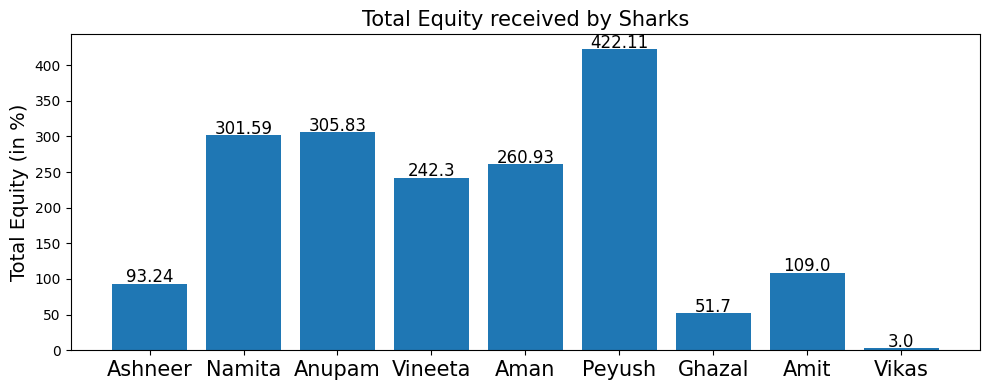

In [25]:

# Visualization Code
equity = [df['Ashneer Investment Equity'].sum(), df['Namita Investment Equity'].sum(), df['Anupam Investment Equity'].sum(), df['Vineeta Investment Equity'].sum(),
    df['Aman Investment Equity'].sum(), df['Peyush Investment Equity'].sum(), df['Ghazal Investment Equity'].sum(), df['Amit Investment Equity'].sum(), df['Guest Investment Equity'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
tmpdf = pd.DataFrame({'Name':name, 'Total Equity':equity })
plt.figure(figsize=(10,4))
plt.bar(tmpdf['Name'], tmpdf['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.tight_layout()
plt.show()

# **Companies who got the same valuation as they requested**

In [26]:
# Displaying the DataFrame
df3 = pd.DataFrame(df[df['Valuation Requested'] == df['Deal Valuation']][['Startup Name','Valuation Requested','Deal Valuation']].reset_index().drop('index',axis=1))
df3

,Startup Name,Valuation Requested,Deal Valuation
0,Kavach,50.0,50.0
1,BeyondSnack,2000.0,2000.0
2,Cocofit,0.0,0.0
3,WattTechnovations,0.0,0.0
4,TheSimplySalad,300.0,300.0
5,Janitri,4000.0,4000.0
6,NeoMotion,10000.0,10000.0
7,PadCare,2500.0,2500.0
8,Geeani,1000.0,1000.0
9,MindPeers,5300.0,5300.0


# **Some companies were on pre-revenue or didn't have any revenue (as of pitching day)**

In [27]:
df4 = df[df['Yearly Revenue'] == 0]['Startup Name'].reset_index().drop('index',axis=1)
print(f'There were {len(df4)} startups that were on pre-revenue on the pitching day.')
df4

There were 13 startups that were on pre-revenue on the pitching day.


,Startup Name
0,MotionBreeze
1,GoodGoodPiggy
2,JulaaAutomation
3,Scholify
4,Sabjikothi
5,On2Cook
6,Scintiglo
7,Sayonara
8,PMV
9,CureSee


# **Use of WordCloud to visualize the most frequently used keywords in startup names**

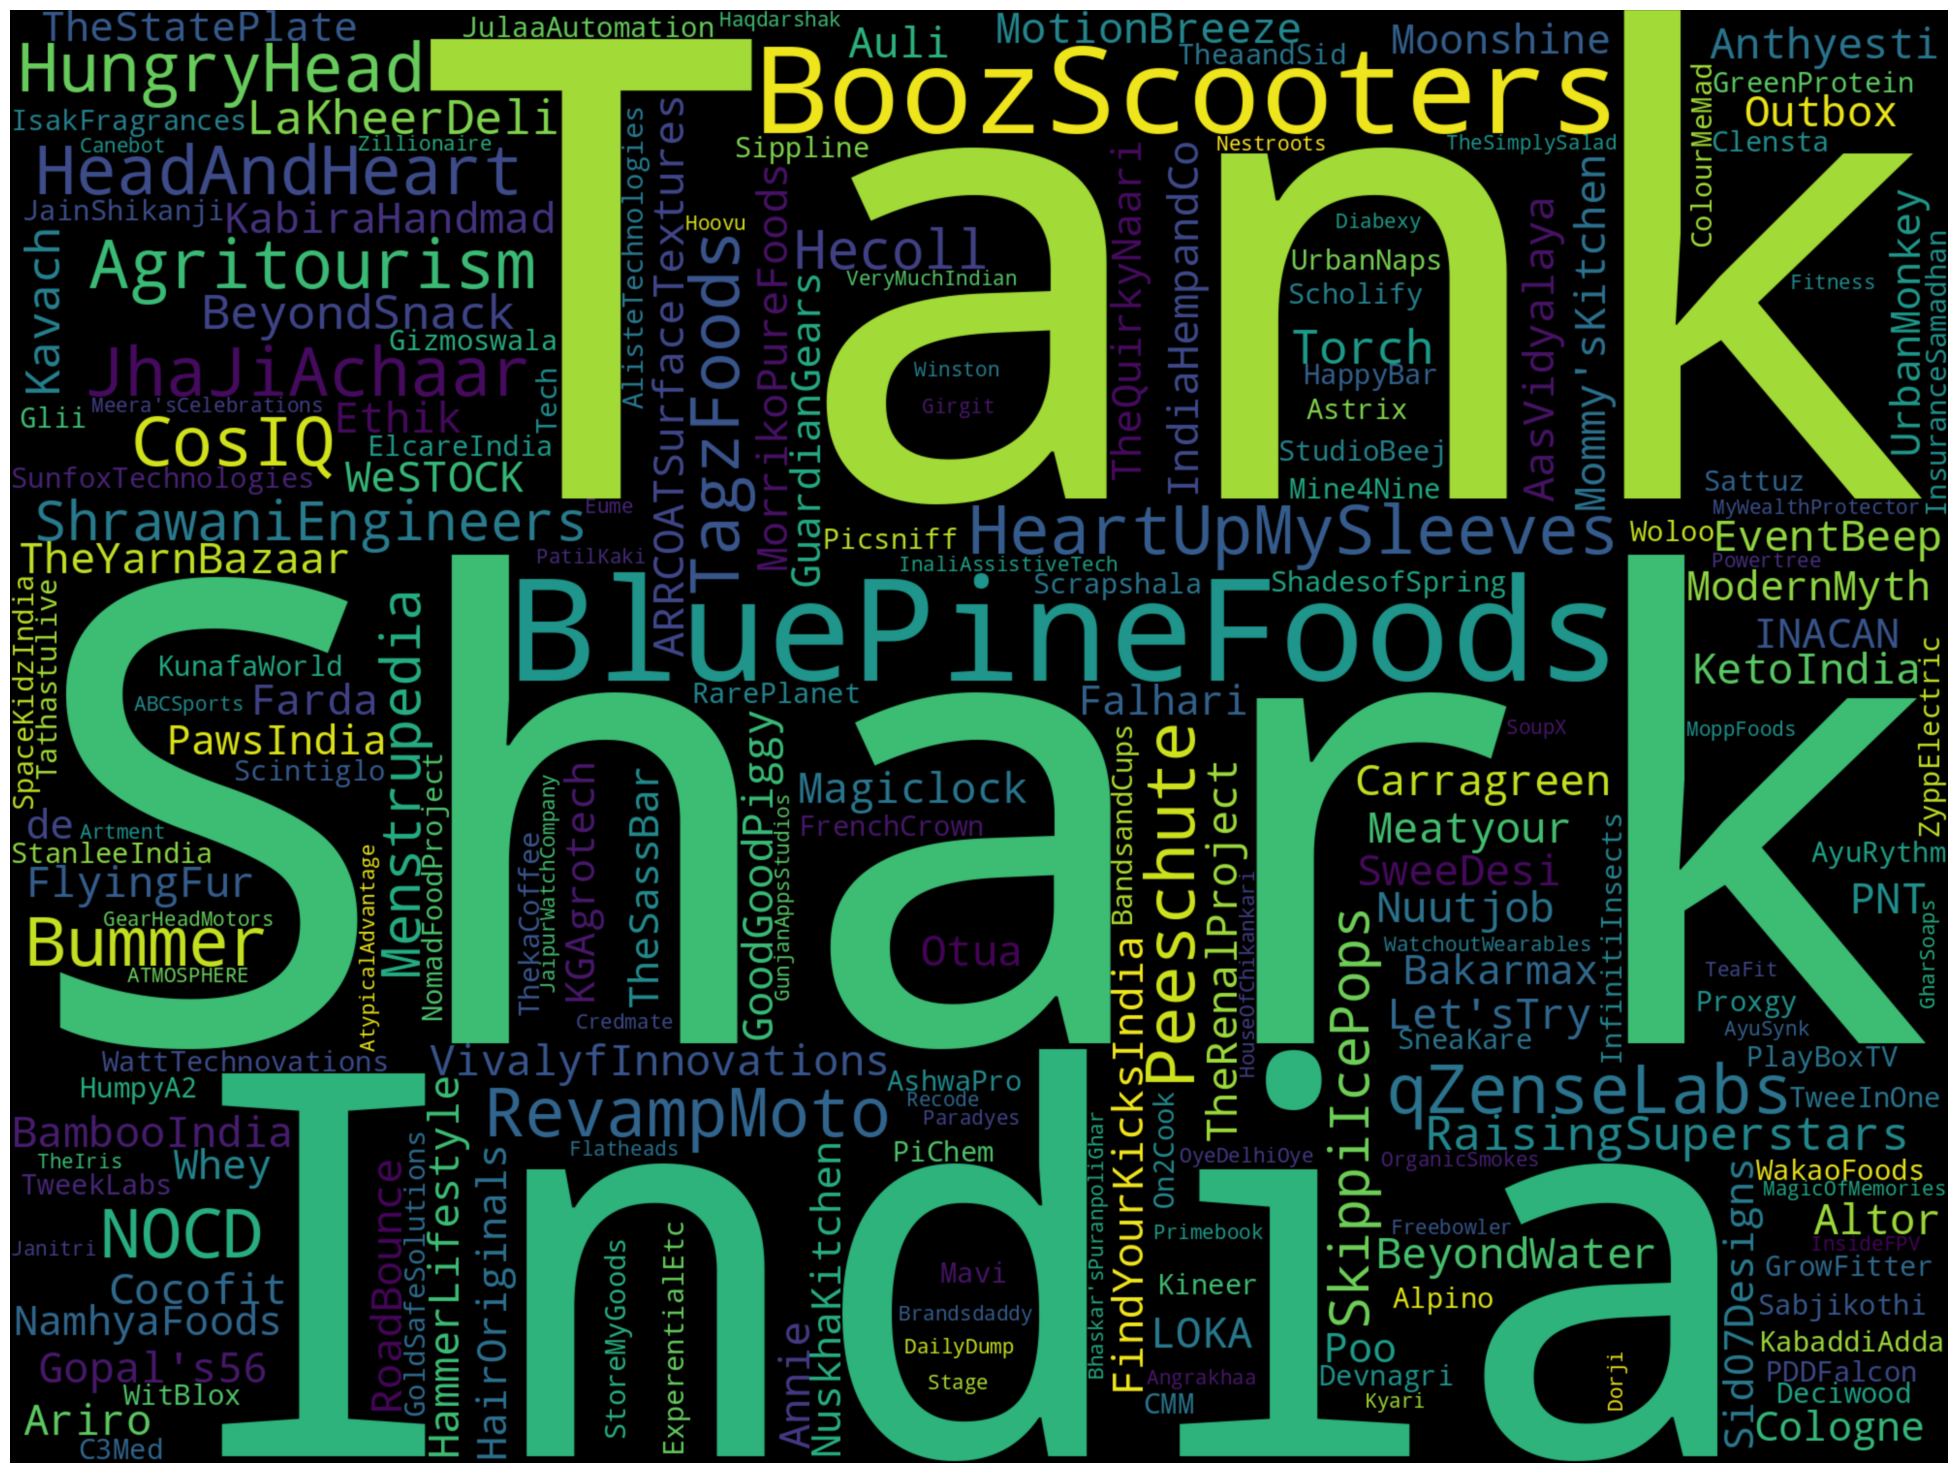

In [28]:

# Text Data
text = " Shark Tank India ".join(cat for cat in df['Startup Name'])
stop_words = list(STOPWORDS)

# Create WordCloud object
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='viridis', collocations=False, random_state=2022).generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()